# **Assignment 2 Part 2: International Soccer** 

*Hesham El Alamy (900212051)*

**Abstract**

The dataset analyzed "includes 43,170 results of international football matches starting from
the very first official match in 1872 up to 2019. The matches are strictly men’s full internationals and the
data does not include Olympic Games or matches where at least one of the teams was the nation’s
B-team, U-23 or a league select team." 

*An Estimate to the probability to win/lose/draw a soccer match will be executed for the following countries.The Estimate will be corresponding 95% Confidence Intervals.* <br>
1-Brazil <br>
2-France <br>
3-Argentina <br>
4-Mexico <br>
5-Portugal <br>

*Each team will be analyzed in terms of the following:* <br>

1- Comparing the probability of win/lose/draw by match type (friendly vs official) <br>
2- Effect of Home fans on match scores <br>

It was concluded that national teams are more likely to win their home matches than their away matches due to several aspects such as fan's support and familiratiy with climate, etc...

**Preparation for Dataset Manupilation and Analysis**

In [478]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [479]:
df=pd.read_csv('results.csv')

In [480]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [481]:
df.shape

(43188, 9)

In [482]:
x=df['home_score']-df['away_score']
conditions=[(x>0),(x<0),(x==0)]

In [483]:
x

0        0
1        2
2        1
3        0
4        3
        ..
43183    1
43184   -2
43185    0
43186    0
43187    0
Length: 43188, dtype: int64

In [484]:
conditions=[(x>0),(x<0),(x==0)]

In [485]:
values=['win','lose','draw']

In [486]:
import numpy as np

In [487]:
df['results']=np.select(conditions,values)

In [488]:
df['results']

0        draw
1         win
2         win
3        draw
4         win
         ... 
43183     win
43184    lose
43185    draw
43186    draw
43187    draw
Name: results, Length: 43188, dtype: object

In [489]:
x=df['results'].value_counts()

In [490]:
x=np.array(x)

In [491]:
x

array([21009, 12224,  9955], dtype=int64)

In [492]:
N=x.sum()

In [493]:
N

43188

In [494]:
CI_win=proportion_confint(count=x[1],nobs=N,alpha=(1-.95))

In [495]:
CI_win

(0.27879305599044235, 0.28729011526083115)

In [496]:
CI_lose=proportion_confint(count=x[0],nobs=N,alpha=(1-.95))

In [497]:
CI_lose

(0.481740705905987, 0.49116843552218753)

In [498]:
CI_draw=proportion_confint(count=x[2],nobs=N,alpha=(1-.95))

In [499]:
CI_draw

(0.2265318471530234, 0.23447584016752862)

**Country 1: Brazil**

In [500]:
dfbra=df[df['country']=='Brazil']

In [501]:
dfbra.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
503,5/11/1919,Brazil,Chile,6,0,Copa América,Rio de Janeiro,Brazil,False,win
505,5/13/1919,Argentina,Uruguay,2,3,Copa América,Rio de Janeiro,Brazil,True,lose
507,5/17/1919,Chile,Uruguay,0,2,Copa América,Rio de Janeiro,Brazil,True,lose
508,5/18/1919,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,win
510,5/22/1919,Argentina,Chile,4,1,Copa América,Rio de Janeiro,Brazil,True,win


In [502]:
conditions = [
    (dfbra['tournament']=='Friendly'),
    (dfbra['tournament']!='Friendly')    ]

In [503]:
values=['Friendly','Official']

In [504]:
dfbra['typematch'] = np.select(conditions, values)

C:\Users\h\AppData\Local\Temp/ipykernel_8568/1731960260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['typematch'] = np.select(conditions, values)


In [505]:
dfbra['typematch'].value_counts()

Official    373
Friendly    194
Name: typematch, dtype: int64

**Comparing the probability of win/lose/draw by match type:**

In [506]:
x=pd.crosstab(dfbra['typematch'],dfbra['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,38,10,146,194
Official,80,103,190,373
All,118,113,336,567


In [507]:
x=np.array(x)
x

array([[ 38,  10, 146, 194],
       [ 80, 103, 190, 373],
       [118, 113, 336, 567]], dtype=int64)

In [508]:
CI_brawin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_brawin_friendly

(0.6918558124106731, 0.8132988267645846)

In [509]:
CI_brawin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_brawin_official

(0.45865077000712196, 0.5601159860250496)

**Plotting Confidence Intervals**

In [510]:
ci_brawin = {};
ci_brawin['Typematch'] = ['Friendly','Official']
ci_brawin['lb'] = [CI_brawin_friendly[0],CI_brawin_official[0]]
ci_brawin['ub'] = [CI_brawin_friendly[1],CI_brawin_official[1]]
df_ci_bra= pd.DataFrame(ci_brawin)
df_ci_bra

,Typematch,lb,ub
0,Friendly,0.691856,0.813299
1,Official,0.458651,0.560116


([<matplotlib.axis.YTick at 0x1fb055a6e50>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

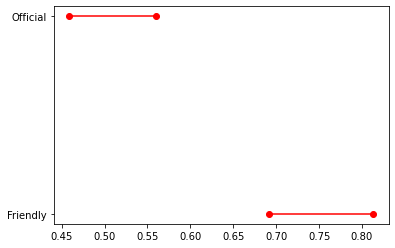

In [511]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci_bra['lb'],df_ci_bra['ub'],range(len(df_ci_bra))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci_bra)),list(df_ci_bra['Typematch']))

*Brazil's National Team are more likely to win a friendly than to win an official match. Putting into consideration that the number of official matches that Brazil played were more than the friendlies with approx 200 matches, the data may be prone to errors and bias since the sample size isn't the same in both groups. Brazil has a probability of 70% to win a friendly whereas they have a probability of 50% to win an official match.*

**Effect of Home fans on match scores**

In [512]:
dfbra['home_team'].loc[dfbra['home_team']=='Brazil']

503      Brazil
508      Brazil
512      Brazil
513      Brazil
515      Brazil
          ...  
42513    Brazil
42529    Brazil
42756    Brazil
42916    Brazil
42956    Brazil
Name: home_team, Length: 353, dtype: object

In [513]:
dfbra['home']=(dfbra['home_team']=='Brazil')

C:\Users\h\AppData\Local\Temp/ipykernel_8568/3044022109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbra['home']=(dfbra['home_team']=='Brazil')


In [514]:
dfbra['home'].value_counts()

True     353
False    214
Name: home, dtype: int64

In [515]:
x=pd.crosstab(dfbra['home'],dfbra['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,47,90,77,214
True,71,23,259,353
All,118,113,336,567


In [516]:
dfbra.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
503,5/11/1919,Brazil,Chile,6,0,Copa América,Rio de Janeiro,Brazil,False,win,Official,True
505,5/13/1919,Argentina,Uruguay,2,3,Copa América,Rio de Janeiro,Brazil,True,lose,Official,False
507,5/17/1919,Chile,Uruguay,0,2,Copa América,Rio de Janeiro,Brazil,True,lose,Official,False
508,5/18/1919,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,win,Official,True


In [517]:
x=np.array(x)
x

array([[ 47,  90,  77, 214],
       [ 71,  23, 259, 353],
       [118, 113, 336, 567]], dtype=int64)

In [518]:
CI_brawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_brawin_home

(0.6876005470699119, 0.7798215492473685)

In [519]:
CI_brawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_brawin_away

(0.2955098113591182, 0.42411635686518084)

In [520]:
ci_brawin = {}
ci_brawin['home'] = ['Yes','No']
ci_brawin['lb'] = [CI_brawin_home[0],CI_brawin_away[0]]
ci_brawin['ub'] = [CI_brawin_home[1],CI_brawin_away[1]]
df_ci= pd.DataFrame(ci_brawin)
df_ci

,home,lb,ub
0,Yes,0.687601,0.779822
1,No,0.295510,0.424116


([<matplotlib.axis.YTick at 0x1fb06b3dac0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

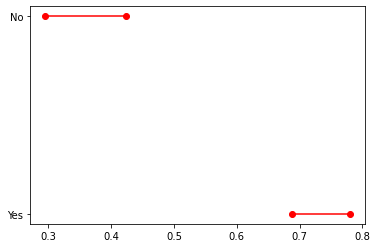

In [521]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

*Brazil are more likely to win a home match rather than winning an away match. The probability of winning an away match is 35%. whereas the probability of winning a home match is 75%, which is approximetly twice the probability of winning an away match More home matches were played (100 game difference), which can make the data slightly bias since the sample size isn't the same.*

**Country 2: France**

In [522]:
dffra=df[df['country']=='France']

In [523]:
dffra.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
166,2/12/1905,France,Switzerland,1,0,Friendly,Paris,France,False,win
185,4/22/1906,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,lose
215,4/12/1908,France,Belgium,1,2,Friendly,Colombes,France,False,lose
257,4/3/1910,France,Belgium,0,4,Friendly,Gentilly,France,False,lose
277,1/1/1911,France,Hungary,0,3,Friendly,Maisons-Alfort,France,False,lose


In [524]:
conditions = [
    (dffra['tournament']=='Friendly'),
    (dffra['tournament']!='Friendly')
    ]

In [525]:
values=['Friendly','Official']

In [526]:
dffra['typematch'] = np.select(conditions, values)

C:\Users\h\AppData\Local\Temp/ipykernel_8568/3804957663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffra['typematch'] = np.select(conditions, values)


In [527]:
dffra['typematch'].value_counts()

Friendly    471
Official    347
Name: typematch, dtype: int64

**Comparing the probability of win/lose/draw by match type:**

In [528]:
x=pd.crosstab(dffra['typematch'],dffra['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,112,131,228,471
Official,77,81,189,347
All,189,212,417,818


In [529]:
x=np.array(x)
x

array([[112, 131, 228, 471],
       [ 77,  81, 189, 347],
       [189, 212, 417, 818]], dtype=int64)

In [530]:
CI_frawin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frawin_friendly
                   

(0.43894415137605935, 0.5292087148659789)

In [531]:
CI_frawin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frawin_official

(0.4922707551354989, 0.5970664206570083)

**Plotting the Confidence Intervals**

In [532]:
ci_frawin = {}
ci_frawin['Typematch'] = ['Friendly','Official']
ci_frawin['lb'] = [CI_frawin_friendly[0],CI_frawin_official[0]]
ci_frawin['ub'] = [CI_frawin_friendly[1],CI_frawin_official[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,Typematch,lb,ub
0,Friendly,0.438944,0.529209
1,Official,0.492271,0.597066


([<matplotlib.axis.YTick at 0x1fb06bb29a0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

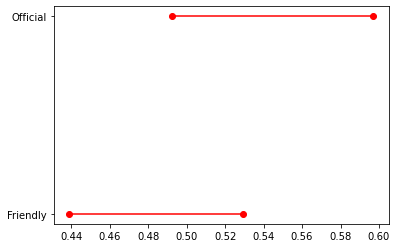

In [533]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

*The confidence intervals of France overlap, and are very close in terms of numerics. The probability of winning an official match is similar to winning a friendly (approx 50%) which shows that France's level doesn't change based on the match type. Also it can be concluded that France isn't consistent in terms of winning matches either they are friendly or not*

**Examining the effect of fans on match scores**

In [534]:
dffra['home_team'].loc[dffra['home_team']=='France']

166      France
185      France
215      France
257      France
277      France
          ...  
42244    France
42346    France
42597    France
42723    France
42988    France
Name: home_team, Length: 443, dtype: object

In [535]:
dffra['home']=(dffra['home_team']=='France')

C:\Users\h\AppData\Local\Temp/ipykernel_8568/1599372481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffra['home']=(dffra['home_team']=='France')


In [536]:
dffra['home'].value_counts()

True     443
False    375
Name: home, dtype: int64

In [537]:
x=pd.crosstab(dffra['home'],dffra['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,100,118,157,375
True,89,94,260,443
All,189,212,417,818


In [538]:
dffra.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
166,2/12/1905,France,Switzerland,1,0,Friendly,Paris,France,False,win,Friendly,True
185,4/22/1906,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,lose,Friendly,True
215,4/12/1908,France,Belgium,1,2,Friendly,Colombes,France,False,lose,Friendly,True
257,4/3/1910,France,Belgium,0,4,Friendly,Gentilly,France,False,lose,Friendly,True


In [539]:
x=np.array(x)
x

array([[100, 118, 157, 375],
       [ 89,  94, 260, 443],
       [189, 212, 417, 818]], dtype=int64)

In [540]:
CI_frawin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_frawin_home

(0.541055825404375, 0.6327590730154896)

In [541]:
CI_frawin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_frawin_away

(0.36873463210645324, 0.46859870122688013)

In [542]:
ci_frawin = {}
ci_frawin['home'] = ['Yes','No']
ci_frawin['lb'] = [CI_frawin_home[0],CI_frawin_away[0]]
ci_frawin['ub'] = [CI_frawin_home[1],CI_frawin_away[1]]
df_ci= pd.DataFrame(ci_frawin)
df_ci

,home,lb,ub
0,Yes,0.541056,0.632759
1,No,0.368735,0.468599


([<matplotlib.axis.YTick at 0x1fb06c1a940>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

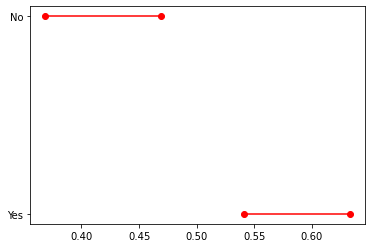

In [543]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

*There is a signifcant difference in the probability of winning home and away matches for the French football team. As for home matches, france have a winning probability of 55%. On the other hand, they have a very low probability of winning away games (43%). The number of away matches and home matches analyzed were slightly similar, which makes the results more reliable.*

**Country 3: Argentina**

In [544]:
dfarg=df[df['country']=='Argentina']

In [545]:
dfarg.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
155,9/13/1903,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,lose
177,8/15/1905,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,draw
190,10/21/1906,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,win
226,9/13/1908,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,win
227,10/4/1908,Argentina,Uruguay,0,1,Copa Premio Honor Argentino,Buenos Aires,Argentina,False,lose


In [546]:
conditions = [
    (dfarg['tournament']=='Friendly'),
    (dfarg['tournament']!='Friendly')]

In [547]:
values=['Friendly','Official']

In [548]:
dfarg['typematch'] = np.select(conditions, values)

C:\Users\h\AppData\Local\Temp/ipykernel_8568/341218318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfarg['typematch'] = np.select(conditions, values)


([<matplotlib.axis.YTick at 0x1fb06c7f400>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

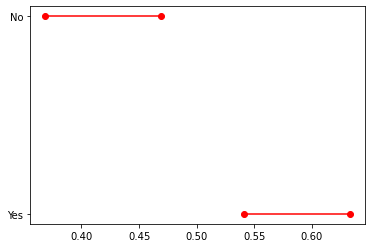

In [549]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

In [550]:
dfarg['typematch'].value_counts()

Official    321
Friendly    135
Name: typematch, dtype: int64

**Comparing the probability of win/lose/draw by match type:**

In [551]:
x=pd.crosstab(dfarg['typematch'],dfarg['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,35,11,89,135
Official,77,59,185,321
All,112,70,274,456


In [552]:
x=np.array(x)
x

array([[ 35,  11,  89, 135],
       [ 77,  59, 185, 321],
       [112,  70, 274, 456]], dtype=int64)

In [553]:
CI_argwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_argwin_friendly
                                                          

(0.5793087273506131, 0.7392097911679053)

In [554]:
CI_argwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_argwin_official

(0.5222677442170198, 0.6303802308608617)

In [555]:
ci_argwin = {}
ci_argwin['Typematch'] = ['Friendly','Official']
ci_argwin['lb'] = [CI_argwin_friendly[0],CI_argwin_official[0]]
ci_argwin['ub'] = [CI_argwin_friendly[1],CI_argwin_official[1]]
df_ci= pd.DataFrame(ci_argwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.579309,0.73921
1,Official,0.522268,0.63038


([<matplotlib.axis.YTick at 0x1fb07d6f550>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

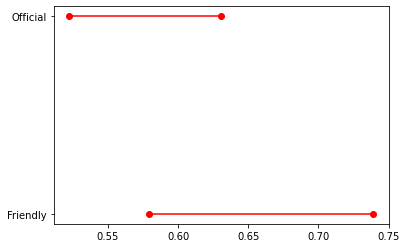

In [556]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

*Argentina played approx 200 official matches more than friendlies, which makes the sample size of friendlies prone to error. Argentina have a 60% probability of winning official matches, whereas they have a 65% probability of winning friendlies. The percentages are not very different, which shows that Argentina deal with friendlies and official matches similarly.*

**Examining the effect of fans on match scores**

In [557]:
dfarg['home']=(dfarg['home_team']=='Argentina')

C:\Users\h\AppData\Local\Temp/ipykernel_8568/705306775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfarg['home']=(dfarg['home_team']=='Argentina')


In [558]:
dfarg['home'].loc[dfarg['home_team']=='Argentina']

155      True
177      True
190      True
226      True
227      True
         ... 
42272    True
42755    True
42853    True
42915    True
43063    True
Name: home, Length: 340, dtype: bool

In [559]:
dfarg['home_team'].loc[dfarg['home_team']=='Argentina']

155      Argentina
177      Argentina
190      Argentina
226      Argentina
227      Argentina
           ...    
42272    Argentina
42755    Argentina
42853    Argentina
42915    Argentina
43063    Argentina
Name: home_team, Length: 340, dtype: object

In [560]:
dfarg['home'].value_counts()

True     340
False    116
Name: home, dtype: int64

In [561]:
x=pd.crosstab(dfarg['home'],dfarg['results'],margins=True)
x

results,draw,lose,win,All
home,,,,
False,27,39,50,116
True,85,31,224,340
All,112,70,274,456


In [562]:
dfarg.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch,home
155,9/13/1903,Argentina,Uruguay,2,3,Friendly,Buenos Aires,Argentina,False,lose,Friendly,True
177,8/15/1905,Argentina,Uruguay,0,0,Copa Lipton,Buenos Aires,Argentina,False,draw,Official,True
190,10/21/1906,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,win,Official,True
226,9/13/1908,Argentina,Uruguay,2,1,Copa Newton,Buenos Aires,Argentina,False,win,Official,True


In [563]:
x=np.array(x)
x

array([[ 27,  39,  50, 116],
       [ 85,  31, 224, 340],
       [112,  70, 274, 456]], dtype=int64)

In [564]:
CI_argwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_argwin_home

(0.6084290783071029, 0.7092179805164265)

In [565]:
CI_argwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_argwin_away

(0.34091512726528816, 0.5211538382519532)

In [566]:
ci_argwin = {}
ci_argwin['home'] = ['Yes','No']
ci_argwin['lb'] = [CI_argwin_home[0],CI_argwin_away[0]]
ci_argwin['ub'] = [CI_argwin_home[1],CI_argwin_away[1]]
df_ci= pd.DataFrame(ci_argwin)
df_ci

,home,lb,ub
0,Yes,0.608429,0.709218
1,No,0.340915,0.521154


([<matplotlib.axis.YTick at 0x1fb07dccd90>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

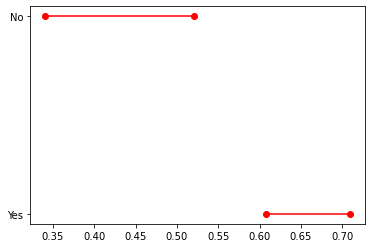

In [567]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

*It is very clear that Argentina are more likely to win a home match than an away match. Argentina has a prob of 65% to win a home match where as they have a prob of 42% of winning an away match. This shows that Argentina are weaker on away grounds, and that their fans can have a strong impact on the player's performance.*

**Country 4: Mexico**

In [568]:
dfmex=df[df['country']=='Mexico']

In [569]:
dfmex.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
776,12/9/1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,win
777,12/12/1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,win
778,12/16/1923,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,False,draw
1654,3/4/1934,Mexico,Cuba,3,2,FIFA World Cup qualification,Mexico City,Mexico,False,win
1657,3/11/1934,Mexico,Cuba,5,0,FIFA World Cup qualification,Mexico City,Mexico,False,win


In [570]:
conditions = [
    (dfmex['tournament']=='Friendly'),
    (dfmex['tournament']!='Friendly') ]

In [571]:
values=['Friendly','Official']

In [572]:
dfmex['typematch'] = np.select(conditions, values)

C:\Users\h\AppData\Local\Temp/ipykernel_8568/1511792898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmex['typematch'] = np.select(conditions, values)


In [573]:
dfmex['typematch'].value_counts()

Official    231
Friendly    167
Name: typematch, dtype: int64

**Comparing the probability of win/lose/draw by match type:**

In [574]:
x=pd.crosstab(dfmex['typematch'],dfmex['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,41,32,94,167
Official,45,39,147,231
All,86,71,241,398


In [575]:
x=np.array(x)
x

array([[ 41,  32,  94, 167],
       [ 45,  39, 147, 231],
       [ 86,  71, 241, 398]], dtype=int64)

In [576]:
CI_mexwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_mexwin_friendly
                                                          

(0.4876429212433331, 0.6381055817506789)

In [577]:
CI_mexwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_mexwin_official

(0.574329829784305, 0.6983974429429677)

In [578]:
ci_mexwin = {}
ci_mexwin['Typematch'] = ['Friendly','Official']
ci_mexwin['lb'] = [CI_mexwin_friendly[0],CI_mexwin_official[0]]
ci_mexwin['ub'] = [CI_mexwin_friendly[1],CI_mexwin_official[1]]
df_ci= pd.DataFrame(ci_mexwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.487643,0.638106
1,Official,0.574330,0.698397


([<matplotlib.axis.YTick at 0x1fb07e36cd0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

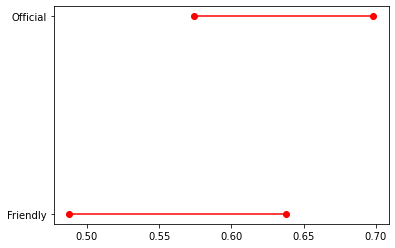

In [579]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

*Mexico played more official matches than friendlies, which can be reflected on the friendly wide confidence interval. Also both confidence intervals overlap. Mexico have a probability of 55% to win a friendly where as they have 63% of winning an official match.*

**Examining the effect of fans on match scores**

In [580]:
dfmex['home_team'].loc[dfmex['home_team']=='Mexico']

776      Mexico
777      Mexico
778      Mexico
1654     Mexico
1657     Mexico
          ...  
41476    Mexico
41673    Mexico
42642    Mexico
42778    Mexico
42841    Mexico
Name: home_team, Length: 270, dtype: object

In [581]:
dfmex.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch
776,12/9/1923,Mexico,Guatemala,2,1,Friendly,Mexico City,Mexico,False,win,Friendly
777,12/12/1923,Mexico,Guatemala,2,0,Friendly,Mexico City,Mexico,False,win,Friendly
778,12/16/1923,Mexico,Guatemala,3,3,Friendly,Mexico City,Mexico,False,draw,Friendly
1654,3/4/1934,Mexico,Cuba,3,2,FIFA World Cup qualification,Mexico City,Mexico,False,win,Official


In [582]:
x=np.array(x)
x

array([[ 41,  32,  94, 167],
       [ 45,  39, 147, 231],
       [ 86,  71, 241, 398]], dtype=int64)

In [583]:
CI_mexwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_mexwin_home

(0.574329829784305, 0.6983974429429677)

In [584]:
CI_mexwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_mexwin_away

(0.4876429212433331, 0.6381055817506789)

In [585]:
ci_mexwin = {}
ci_mexwin['home'] = ['Yes','No']
ci_mexwin['lb'] = [CI_mexwin_home[0],CI_mexwin_away[0]]
ci_mexwin['ub'] = [CI_mexwin_home[1],CI_mexwin_away[1]]
df_ci= pd.DataFrame(ci_mexwin)
df_ci

,home,lb,ub
0,Yes,0.574330,0.698397
1,No,0.487643,0.638106


([<matplotlib.axis.YTick at 0x1fb07e89fd0>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

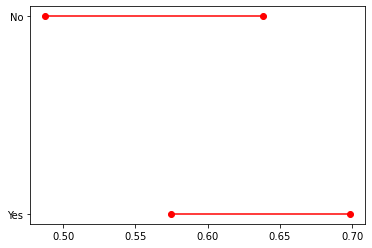

In [586]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

*Mexico played more home matches than friendlies, which can be reflected on the friendly wide confidence interval. Also both confidence intervals overlap. Mexico have a probability of 55% to win a home match where as they have 63% of winning an away match.*

**Country 5: Portugal**

In [587]:
dfpor=df[df['country']=='Portugal']

In [588]:
dfpor.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
689,12/17/1922,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,lose
896,6/18/1925,Portugal,Italy,1,0,Friendly,Lisbon,Portugal,False,win
1028,12/26/1926,Portugal,Hungary,3,3,Friendly,Porto,Portugal,False,draw
1035,3/16/1927,Portugal,France,4,0,Friendly,Lisbon,Portugal,False,win
1111,1/8/1928,Portugal,Spain,2,2,Friendly,Lisbon,Portugal,False,draw


In [589]:
conditions = [
    (dfpor['tournament']=='Friendly'),
    (dfpor['tournament']!='Friendly')   ]

In [590]:
values=['Friendly','Official']

In [591]:
dfpor['typematch'] = np.select(conditions, values)

C:\Users\h\AppData\Local\Temp/ipykernel_8568/1856830226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfpor['typematch'] = np.select(conditions, values)


In [592]:
dfpor['typematch'].value_counts()

Friendly    193
Official    179
Name: typematch, dtype: int64

**Comparing the probability of win/lose/draw by match type:**

In [593]:
x=pd.crosstab(dfpor['typematch'],dfpor['results'],margins=True)
x

results,draw,lose,win,All
typematch,,,,
Friendly,54,53,86,193
Official,44,34,101,179
All,98,87,187,372


In [594]:
x=np.array(x)
x

array([[ 54,  53,  86, 193],
       [ 44,  34, 101, 179],
       [ 98,  87, 187, 372]], dtype=int64)

In [595]:
CI_porwin_friendly=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_porwin_friendly
                                                          

(0.3754740248527574, 0.5157176849918021)

In [596]:
CI_porwin_official=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_porwin_official

(0.49160569342990423, 0.6368859266818276)

In [597]:
ci_porwin = { }
ci_porwin['Typematch'] = ['Friendly','Official']
ci_porwin['lb'] = [CI_porwin_friendly[0],CI_porwin_official[0]]
ci_porwin['ub'] = [CI_porwin_friendly[1],CI_porwin_official[1]]
df_ci= pd.DataFrame(ci_porwin)
df_ci

,Typematch,lb,ub
0,Friendly,0.375474,0.515718
1,Official,0.491606,0.636886


([<matplotlib.axis.YTick at 0x1fb07eeb3d0>,
 [Text(0, 0, 'Friendly'), Text(0, 1, 'Official')])

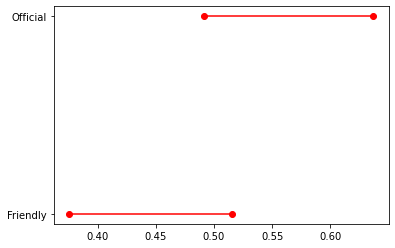

In [598]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['Typematch']))

*Portugal played approx similar number of friendly and offical matches, which makes the confidence intervals more reliable despite the wide intervals. As for official matches, Portgual has a win percentage of 55%. On the other hand, portugal has a 44% of winning a friendly. This shows that portgual takes official matches more seriously.*

**Examining the effect of fans on match scores**

In [599]:
dfpor['home_team'].loc[dfpor['home_team']=='Portugal']

689      Portugal
896      Portugal
1028     Portugal
1035     Portugal
1111     Portugal
           ...   
42373    Portugal
42594    Portugal
42834    Portugal
42882    Portugal
43002    Portugal
Name: home_team, Length: 296, dtype: object

In [600]:
dfpor.head(4)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,typematch
689,12/17/1922,Portugal,Spain,1,2,Friendly,Lisbon,Portugal,False,lose,Friendly
896,6/18/1925,Portugal,Italy,1,0,Friendly,Lisbon,Portugal,False,win,Friendly
1028,12/26/1926,Portugal,Hungary,3,3,Friendly,Porto,Portugal,False,draw,Friendly
1035,3/16/1927,Portugal,France,4,0,Friendly,Lisbon,Portugal,False,win,Friendly


In [601]:
x=np.array(x)
x

array([[ 54,  53,  86, 193],
       [ 44,  34, 101, 179],
       [ 98,  87, 187, 372]], dtype=int64)

In [602]:
CI_porwin_home=proportion_confint(count=x[1,2],nobs=x[1,3],alpha=(1-.95))
CI_porwin_home

(0.49160569342990423, 0.6368859266818276)

In [603]:
CI_porwin_away=proportion_confint(count=x[0,2],nobs=x[0,3],alpha=(1-.95))
CI_porwin_away

(0.3754740248527574, 0.5157176849918021)

In [604]:
ci_porwin = {}
ci_porwin['home'] = ['Yes','No']
ci_porwin['lb'] = [CI_porwin_home[0],CI_porwin_away[0]]
ci_porwin['ub'] = [CI_porwin_home[1],CI_porwin_away[1]]
df_ci= pd.DataFrame(ci_porwin)
df_ci

,home,lb,ub
0,Yes,0.491606,0.636886
1,No,0.375474,0.515718


([<matplotlib.axis.YTick at 0x1fb07f41880>,
 [Text(0, 0, 'Yes'), Text(0, 1, 'No')])

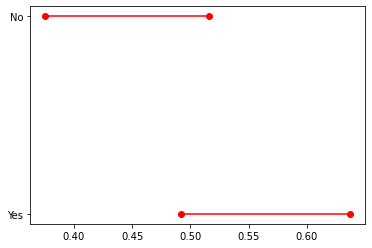

In [605]:
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['home']))

*As for away matches, Portgual has a win percentage of 42%. On the other hand, portugal has a 55% of winning a home match. This shows that portgual home fans have a slight impact on their player's performance.*

### Conclusion and Discussion

**Part 1: By the Numbers**

Examining the Numbers, it can be concluded that France has the biggest portion of the data from the countries analyzed in this notebook with 818 matches. The lowest national team is portugal with 372 matches. This surely negatively impacts the conclusion since not all countries have the same sample size, which makes teams with less number of matches have a less accurate estimate.

**Part 2: Official or Friendly?**

In most of the countries analyzed, there was a vivid difference between official and friendly matches. Brazil was the strongest national team in friendlies with a win probability of 70%. On the other hand, France had the lowest probability of winning a friendly with 50%. As for official matches, mexico had the highest win probability with 63%, and in second place came Argentina with 60%. As for portugal, they had a very low win probability of official matches with 44%. 

**Part 3: Home or Away?**

The long lasting debate of whether home matches are easier to win or not has been stastically examined. All 5 teams had a higher probability of winning home matches than away matches. Brazil had the highest probability of winning a home match, which can be concluded that the brazilian fans do impact their national team's performance. However, all 5 teams had very low chance of winning away matches, which is an area of concern. National teams should focus on doing extensive research on the purpose behind such low probabilities especially since nowadays friendlies started impacting the countries' overall fifa rank.